In [1]:
import sys

In [2]:
sys.path.append("/home/user/hSBM_Topicmodel")

In [3]:
from sbmtm import sbmtm
import graph_tool.all as gt
import pandas as pd
from plotly import figure_factory as ff

In [145]:
comments_df = pd.read_csv("/home/user/mnt/DSLab/workdir/Topic-Detection-on-Reddit/data/lemma/group_40_100.csv")
stock_df = pd.read_csv("/home/user/mnt/DSLab/workdir/Topic-Detection-on-Reddit/data/psaw_comments_from_sept1_pol_1013.csv",
                      sep=';')

In [146]:
change_id_dict = dict(zip(comments_df.index, comments_df["Unnamed: 0"]))

In [147]:
texts = comments_df.text.map(lambda line: line.split(" ")).to_list()

In [148]:
model = sbmtm()

model.make_graph(texts)

model.fit()

<NestedBlockState object, with base <BlockState object with 13952 blocks (27 nonempty), degree-corrected, for graph <Graph object, undirected, with 14977 vertices and 31678 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f7e1cc1bd00>, at 0x7f7e1bece2b0>, and 5 levels of sizes [(14977, 27), (27, 8), (8, 3), (3, 2), (2, 1)] at 0x7f7e1bece3d0>


In [141]:
model.plot(nedges=10000, filename = "small_lemma.png")

In [72]:
import numpy as np
stock_df.iloc[ comments_df.iloc[ np.array(list(model.clusters(l = 1).values()))[0][:,0]]["Unnamed: 0"] ].text



8571                                               Mótvár
3147    "Egy Fideszes ismerõsöm üzenetet küldött a Fac...
3205          https://www.youtube.com/watch?v=Sji3zduFBDc
3203    Az egész balhé ezzel a ki indul ki lép vissza ...
3193    >A propagandagépezet azt hiszem, hogy saját ma...
3191    Lehet hogy csak buborék, lehet hogy ostobák. \...
3190    >Hát tényleg ennyire ostoba a magyar nép társa...
3186            Mszp még létezik? Nem kell neki. Viszlát.
3184                  Botka meg MZP-t támogatja! Egy-egy!
3179    Hogy tud Klára megkétszerezett erővel "országo...
Name: text, dtype: object

In [104]:
model.print_summary()

In [96]:
comments_df.iloc[new_id].text

'emlekszem micsoda ûrkorhazak Fidesz elott mazli ugyan asztal ulhettem altalanos suli mamam szar Fidesz sracok naivitassal kurva nehez elet'

In [33]:
topic_dict = model.topics(l=0,n=20)

In [37]:
def topicDict2Df(level):
    topic_dict = model.topics(l=level,n=20)
    col_pairs = []
    for key in topic_dict.keys():

        words, vals = zip(*topic_dict[ key ])
        col_pairs.append( words )
        col_pairs.append( vals )

    topic_df = pd.DataFrame(col_pairs).T
    topic_df.rename(columns = { col: f"topic_{col//2}" if col%2==0 else f"value_{col//2}" for col in topic_df.columns},
                   inplace = True)
    
    for col in topic_df.columns:
        if "value" in col:
            topic_df[col] = pd.to_numeric( topic_df[col] )
            
    topic_df = topic_df.round( {col: 4 for col in topic_df.columns} )
    return topic_df

In [35]:
def show_table(topic_dict):
    df = topicDict2Df(topic_dict)
    fig = ff.create_table(df)
    fig.update_layout(width = 100 * df.shape[1] )
    fig.show()

In [129]:
new_id = 369
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(stock_df[ stock_df.comment_id == comments_df.loc[new_id].comment_id])
#model.get_groups()["p_tw_d"][:,new_id]

      Unnamed: 0 comment_id  \
2413        2413    hg4bh9o   

                                                   text     author  upvotes  \
2413  > Miért kérem én a baloldali szavazatokat is?”...  ellenkult      -13   

       timestamp post_id  
2413  1633883598  q5b8e1  


In [173]:
pd.options.display.max_colwidth = 1000
def lookupComment(new_id):
    print(stock_df[ stock_df.comment_id == comments_df.loc[new_id].comment_id].text.to_string())

In [197]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
topicDict2Df(level = 2)

,topic_0,value_0
0,mzp,0.0073
1,Fidesz,0.0069
2,dobrev,0.0060
3,szavaz,0.0059
4,ember,0.0052
5,mond,0.0047
6,akar,0.0041
7,megy,0.0040
8,dolog,0.0036
9,karácsony,0.0036


In [177]:
topdist_list = [ model.topicdist(i, l=0) for i in comments_df.index ]

In [193]:
topdist_dict = [ dict( dist ) for dist in  topdist_list ]

In [201]:
topdist_df = pd.DataFrame(topdist_dict)
topdist_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.976744,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
1,0.170213,0.000000,0.085106,0.702128,0.021277,0.021277,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
2,0.075000,0.000000,0.075000,0.800000,0.025000,0.025000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
3,0.813953,0.046512,0.069767,0.000000,0.023256,0.000000,0.023256,0.023256,0.000000,0.0,0.0,0.0,0.00000
4,0.428571,0.122449,0.142857,0.000000,0.183673,0.000000,0.102041,0.020408,0.000000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.666667,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.00000
625,0.755556,0.111111,0.044444,0.000000,0.000000,0.000000,0.022222,0.000000,0.066667,0.0,0.0,0.0,0.00000
626,0.666667,0.023810,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.261905,0.0,0.0,0.0,0.00000
627,0.825000,0.100000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.0,0.0,0.0,0.00000


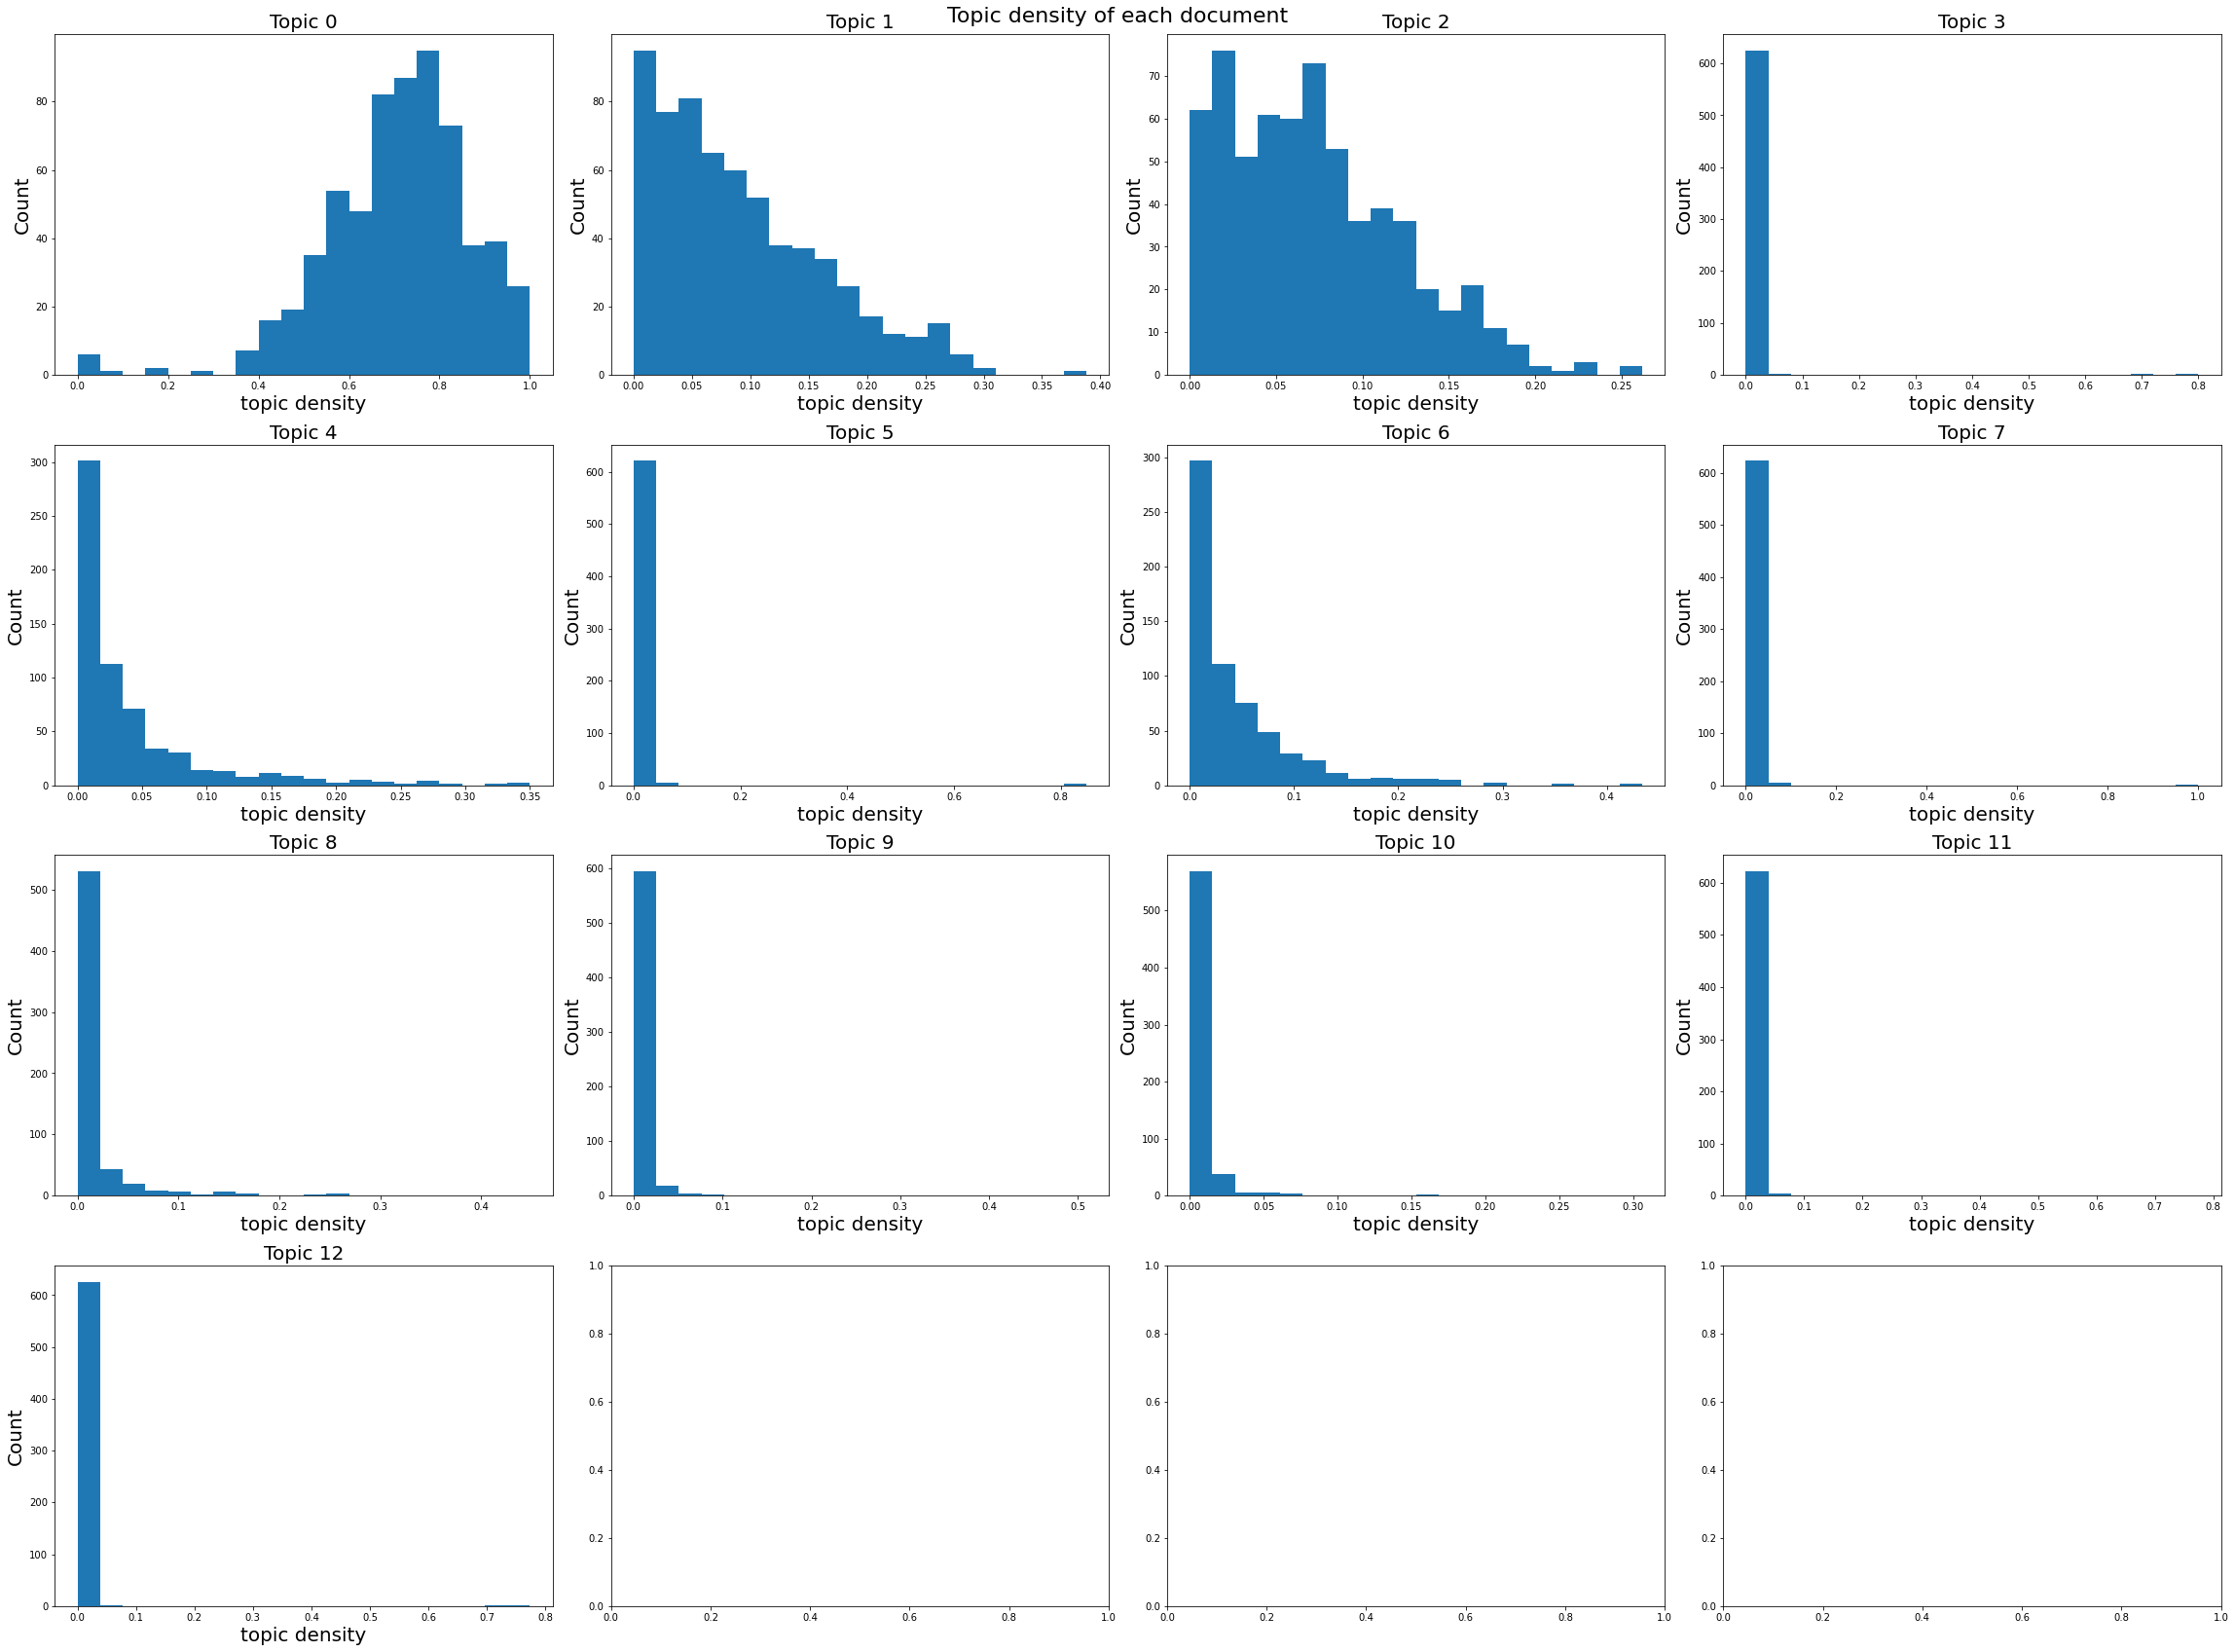

In [212]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4, figsize=[4*8, 4*6])
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx > 12:
        break
    ax.hist(topdist_df[idx], bins = 20)
    ax.set_title(f"Topic {idx}",size=20)
    ax.set_ylabel("Count", size=20)
    ax.set_xlabel("topic density", size=20)
    
    
fig.suptitle("Topic density of each document", size=22)
plt.savefig("topic_density.png")
plt.tight_layout()